# Face Generation
In this project, you'll use generative adversarial networks to generate new images of faces.
### Get the Data
You'll be using two datasets in this project:
- MNIST
- CelebA

Since the celebA dataset is complex and you're doing GANs in a project for the first time, we want you to test your neural network on MNIST before CelebA.  Running the GANs on MNIST will allow you to see how well your model trains sooner.

If you're using [FloydHub](https://www.floydhub.com/), set `data_dir` to "/input" and use the [FloydHub data ID](http://docs.floydhub.com/home/using_datasets/) "R5KrjnANiKVhLWAkpXhNBe".

In [1]:
data_dir = '/input'

# FloydHub - Use with data ID "R5KrjnANiKVhLWAkpXhNBe"
#data_dir = '/input'


"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
import helper

helper.download_extract('mnist', data_dir)
helper.download_extract('celeba', data_dir)

Found mnist Data
Found celeba Data


## Explore the Data
### MNIST
As you're aware, the [MNIST](http://yann.lecun.com/exdb/mnist/) dataset contains images of handwritten digits. You can view the first number of examples by changing `show_n_images`. 

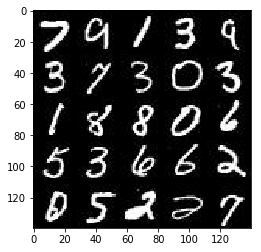

In [2]:
show_n_images = 25

"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
%matplotlib inline
import os
from glob import glob
from matplotlib import pyplot

mnist_images = helper.get_batch(glob(os.path.join(data_dir, 'mnist/*.jpg'))[:show_n_images], 28, 28, 'L')
pyplot.imshow(helper.images_square_grid(mnist_images, 'L'), cmap='gray')

### CelebA
The [CelebFaces Attributes Dataset (CelebA)](http://mmlab.ie.cuhk.edu.hk/projects/CelebA.html) dataset contains over 200,000 celebrity images with annotations.  Since you're going to be generating faces, you won't need the annotations.  You can view the first number of examples by changing `show_n_images`.

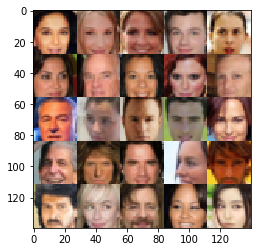

In [3]:
show_n_images = 25

"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
mnist_images = helper.get_batch(glob(os.path.join(data_dir, 'img_align_celeba/*.jpg'))[:show_n_images], 28, 28, 'RGB')
pyplot.imshow(helper.images_square_grid(mnist_images, 'RGB'))

## Preprocess the Data
Since the project's main focus is on building the GANs, we'll preprocess the data for you.  The values of the MNIST and CelebA dataset will be in the range of -0.5 to 0.5 of 28x28 dimensional images.  The CelebA images will be cropped to remove parts of the image that don't include a face, then resized down to 28x28.

The MNIST images are black and white images with a single [color channel](https://en.wikipedia.org/wiki/Channel_(digital_image%29) while the CelebA images have [3 color channels (RGB color channel)](https://en.wikipedia.org/wiki/Channel_(digital_image%29#RGB_Images).
## Build the Neural Network
You'll build the components necessary to build a GANs by implementing the following functions below:
- `model_inputs`
- `discriminator`
- `generator`
- `model_loss`
- `model_opt`
- `train`

### Check the Version of TensorFlow and Access to GPU
This will check to make sure you have the correct version of TensorFlow and access to a GPU

In [4]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
from distutils.version import LooseVersion
import warnings
import tensorflow as tf

# Check TensorFlow Version
assert LooseVersion(tf.__version__) >= LooseVersion('1.0'), 'Please use TensorFlow version 1.0 or newer.  You are using {}'.format(tf.__version__)
print('TensorFlow Version: {}'.format(tf.__version__))

# Check for a GPU
if not tf.test.gpu_device_name():
    warnings.warn('No GPU found. Please use a GPU to train your neural network.')
else:
    print('Default GPU Device: {}'.format(tf.test.gpu_device_name()))

TensorFlow Version: 1.0.0
Default GPU Device: /gpu:0


### Input
Implement the `model_inputs` function to create TF Placeholders for the Neural Network. It should create the following placeholders:
- Real input images placeholder with rank 4 using `image_width`, `image_height`, and `image_channels`.
- Z input placeholder with rank 2 using `z_dim`.
- Learning rate placeholder with rank 0.

Return the placeholders in the following the tuple (tensor of real input images, tensor of z data)

In [5]:
import problem_unittests as tests

def model_inputs(image_width, image_height, image_channels, z_dim):
    """
    Create the model inputs
    :param image_width: The input image width
    :param image_height: The input image height
    :param image_channels: The number of image channels
    :param z_dim: The dimension of Z
    :return: Tuple of (tensor of real input images, tensor of z data, learning rate)
    """
    # TODO: Implement Function
    input_real = tf.placeholder(tf.float32, (None, image_width, image_height, image_channels), name = 'input_real')
    input_z = tf.placeholder(tf.float32, (None, z_dim), name = 'input_z')
    learning_rate = tf.placeholder(tf.float32, None, name ='learning_rate')
    return input_real, input_z , learning_rate


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_inputs(model_inputs)

Tests Passed


### Discriminator
Implement `discriminator` to create a discriminator neural network that discriminates on `images`.  This function should be able to reuse the variables in the neural network.  Use [`tf.variable_scope`](https://www.tensorflow.org/api_docs/python/tf/variable_scope) with a scope name of "discriminator" to allow the variables to be reused.  The function should return a tuple of (tensor output of the discriminator, tensor logits of the discriminator).

In [6]:
def discriminator(images, reuse=False):
    """
    Create the discriminator network
    :param images: Tensor of input image(s)
    :param reuse: Boolean if the weights should be reused
    :return: Tuple of (tensor output of the discriminator, tensor logits of the discriminator)
    """
    # TODO: Implement Function
    with tf.variable_scope ('discriminator', reuse=reuse):
    
        x1 = tf.layers.conv2d(images, 64, 5, strides=2, padding = 'same')
        relu1 = tf.maximum(0.01 * x1, x1)
    
        x2 = tf.layers.conv2d(relu1, 128, 5, strides=2, padding = 'same')
        bn2 = tf.layers.batch_normalization(x2, training = True)
        relu2 = tf.maximum(0.01 *bn2, bn2)
    
        x3 = tf.layers.conv2d(relu2, 256, 5, strides=2, padding = 'same')
        bn3 = tf.layers.batch_normalization(x3, training =True)
        relu3 =tf.maximum (0.01 *bn3, bn3)
    
        flat = tf.reshape(relu3, (-1, 4*4*256))
        logits = tf.layers.dense(flat, 1)
        output = tf.sigmoid(logits)
    
        return output,logits


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_discriminator(discriminator, tf)

Tests Passed


### Generator
Implement `generator` to generate an image using `z`. This function should be able to reuse the variables in the neural network.  Use [`tf.variable_scope`](https://www.tensorflow.org/api_docs/python/tf/variable_scope) with a scope name of "generator" to allow the variables to be reused. The function should return the generated 28 x 28 x `out_channel_dim` images.

In [7]:
def generator(z, out_channel_dim, is_train=True):
    """
    Create the generator network
    :param z: Input z
    :param out_channel_dim: The number of channels in the output image
    :param is_train: Boolean if generator is being used for training
    :return: The tensor output of the generator
    """
    # TODO: Implement Function
    with  tf.variable_scope('generator', reuse=not is_train):
        
        x1 = tf.layers.dense(z, 7*7*512)
        
        x1 = tf.reshape (x1, (-1,7,7,512))
        
        x1 = tf.layers.batch_normalization (x1, training = is_train)
        
        x1 = tf.maximum (0.01*x1, x1)
        
        x2 = tf.layers.conv2d_transpose(x1, 256, 5, strides =1, padding='same')
       
        x2 = tf.layers.batch_normalization(x2, training = is_train)
    
        x2 = tf.maximum(0.01*x2, x2)
        
        x3 = tf.layers.conv2d_transpose(x2, 128, 5, strides =2, padding='same')
        
        x3 = tf.layers.batch_normalization(x3, training =is_train)
        
        x3 = tf.maximum (0.01*x3, x3)
        
        logits = tf.layers.conv2d_transpose(x3, out_channel_dim, 5, strides=2, padding ='same')
        
        output = tf.tanh(logits)
        
        return output


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_generator(generator, tf)

Tests Passed


### Loss
Implement `model_loss` to build the GANs for training and calculate the loss.  The function should return a tuple of (discriminator loss, generator loss).  Use the following functions you implemented:
- `discriminator(images, reuse=False)`
- `generator(z, out_channel_dim, is_train=True)`

In [8]:
def model_loss(input_real, input_z, out_channel_dim):
    """
    Get the loss for the discriminator and generator
    :param input_real: Images from the real dataset
    :param input_z: Z input
    :param out_channel_dim: The number of channels in the output image
    :return: A tuple of (discriminator loss, generator loss)
    """
    # TODO: Implement Function
    
    gen_mod = generator(input_z, out_channel_dim)
    
    dis_mod_real, dis_logits_real = discriminator (input_real)
    
    dis_mod_fake, dis_logits_fake = discriminator (gen_mod, reuse = True)
    
    dis_loss_real = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(logits = dis_logits_real, labels=tf.ones_like(dis_logits_real) * 0.9))
    
    dis_loss_fake = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(logits= dis_logits_fake, labels=tf.zeros_like(dis_logits_fake)))
    
    dis_loss = dis_loss_real + dis_loss_fake
    
    gen_loss =tf.reduce_mean (tf.nn.sigmoid_cross_entropy_with_logits(logits=dis_logits_fake, labels = tf.ones_like(dis_logits_fake)))
    
    return dis_loss, gen_loss


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_loss(model_loss)

Tests Passed


### Optimization
Implement `model_opt` to create the optimization operations for the GANs. Use [`tf.trainable_variables`](https://www.tensorflow.org/api_docs/python/tf/trainable_variables) to get all the trainable variables.  Filter the variables with names that are in the discriminator and generator scope names.  The function should return a tuple of (discriminator training operation, generator training operation).

In [9]:
def model_opt(d_loss, g_loss, learning_rate, beta1):
    """
    Get optimization operations
    :param d_loss: Discriminator loss Tensor
    :param g_loss: Generator loss Tensor
    :param learning_rate: Learning Rate Placeholder
    :param beta1: The exponential decay rate for the 1st moment in the optimizer
    :return: A tuple of (discriminator training operation, generator training operation)
    """
    # TODO: Implement 
    
    train_var = tf.trainable_variables()
    
    dis_var= [var for var in train_var if var.name.startswith('discriminator')]
    
    gen_var = [var for var in train_var if var.name.startswith('generator')]
    
    update_ops = tf.get_collection(tf.GraphKeys.UPDATE_OPS)
    
    gen_update = [op for op in update_ops if op.name.startswith('generator')]
    
    with tf.control_dependencies(gen_update):
        
        dis_train_ops = tf.train.AdamOptimizer(learning_rate, beta1=beta1).minimize(d_loss, var_list=dis_var)
        
        gen_train_ops = tf.train.AdamOptimizer(learning_rate, beta1=beta1).minimize(g_loss, var_list=gen_var)
    
        return dis_train_ops, gen_train_ops


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_opt(model_opt, tf)

Tests Passed


## Neural Network Training
### Show Output
Use this function to show the current output of the generator during training. It will help you determine how well the GANs is training.

In [10]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
import numpy as np

def show_generator_output(sess, n_images, input_z, out_channel_dim, image_mode):
    """
    Show example output for the generator
    :param sess: TensorFlow session
    :param n_images: Number of Images to display
    :param input_z: Input Z Tensor
    :param out_channel_dim: The number of channels in the output image
    :param image_mode: The mode to use for images ("RGB" or "L")
    """
    cmap = None if image_mode == 'RGB' else 'gray'
    
    z_dim = input_z.get_shape().as_list()[-1]
    
    example_z = np.random.uniform(-1, 1, size=[n_images, z_dim])

    samples = sess.run(
        
        generator(input_z, out_channel_dim, False),
        
        feed_dict={input_z: example_z})

    images_grid = helper.images_square_grid(samples, image_mode)
    
    pyplot.imshow(images_grid, cmap=cmap)
    
    pyplot.show()

### Train
Implement `train` to build and train the GANs.  Use the following functions you implemented:
- `model_inputs(image_width, image_height, image_channels, z_dim)`
- `model_loss(input_real, input_z, out_channel_dim)`
- `model_opt(d_loss, g_loss, learning_rate, beta1)`

Use the `show_generator_output` to show `generator` output while you train. Running `show_generator_output` for every batch will drastically increase training time and increase the size of the notebook.  It's recommended to print the `generator` output every 100 batches.

In [13]:
def train(epoch_count, batch_size, z_dim, learning_rate, beta1, get_batches, data_shape, data_image_mode):
    """
    Train the GAN
    :param epoch_count: Number of epochs
    :param batch_size: Batch Size
    :param z_dim: Z dimension
    :param learning_rate: Learning Rate
    :param beta1: The exponential decay rate for the 1st moment in the optimizer
    :param get_batches: Function to get batches
    :param data_shape: Shape of the data
    :param data_image_mode: The image mode to use for images ("RGB" or "L")
    """
    # TODO: Build Model 
    
    _, image_width, image_height, image_channels = data_shape 
    
    input_real, input_z, in_learning_rate = model_inputs(image_width, image_height, image_channels, z_dim)
    
    dis_loss, gen_loss = model_loss(input_real, input_z, image_channels)
    
    dis_ops, gen_ops = model_opt(dis_loss, gen_loss, learning_rate, beta1)
    
    steps = 0
    
    print_every = 10
    
    show_every = 100
    
    saver = tf.train.Saver()
    
    with tf.Session() as sess:
        sess.run(tf.global_variables_initializer())
        for epoch_i in range(epoch_count):
            for batch_images in get_batches(batch_size):
                
                # TODO: Train Model
                
                steps += 1
                
                batch_images *= 2
                
                batch_z = np.random.uniform(-1, 1, size=(batch_size, z_dim))
                
                _ = sess.run(dis_ops, feed_dict={ input_real: batch_images, input_z: batch_z, in_learning_rate: learning_rate })
                _ = sess.run(gen_ops, feed_dict={ input_z: batch_z, in_learning_rate: learning_rate})
                
                if steps % print_every == 0:
                    dis_loss_train = dis_loss.eval({
                        input_z: batch_z,
                        input_real: batch_images
                    })
                    gen_loss_train = gen_loss.eval({
                        input_z: batch_z
                    })
                    
                    print("Epoch {}/{}...".format(epoch_i+1, epoch_count),
                         "Discriminator Loss: {:.4f}...".format(dis_loss_train),
                         "Generator Loss: {:.4f}".format(gen_loss_train))
                    
                if steps % show_every == 0:
                    show_generator_output(sess, 25, input_z, image_channels, data_image_mode)
                       

### MNIST
Test your GANs architecture on MNIST.  After 2 epochs, the GANs should be able to generate images that look like handwritten digits.  Make sure the loss of the generator is lower than the loss of the discriminator or close to 0.

Epoch 1/2... Discriminator Loss: 0.8016... Generator Loss: 7.6293
Epoch 1/2... Discriminator Loss: 0.7752... Generator Loss: 3.6232
Epoch 1/2... Discriminator Loss: 0.7993... Generator Loss: 2.8217
Epoch 1/2... Discriminator Loss: 0.6089... Generator Loss: 2.9294
Epoch 1/2... Discriminator Loss: 0.8062... Generator Loss: 1.6384
Epoch 1/2... Discriminator Loss: 0.4828... Generator Loss: 3.7107
Epoch 1/2... Discriminator Loss: 0.7426... Generator Loss: 2.1012
Epoch 1/2... Discriminator Loss: 0.8229... Generator Loss: 1.9451
Epoch 1/2... Discriminator Loss: 3.3095... Generator Loss: 6.1283
Epoch 1/2... Discriminator Loss: 1.0833... Generator Loss: 0.9717


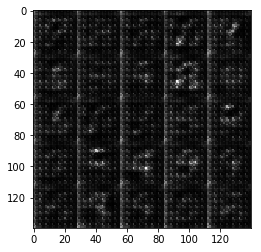

Epoch 1/2... Discriminator Loss: 0.9419... Generator Loss: 1.5991
Epoch 1/2... Discriminator Loss: 1.2104... Generator Loss: 0.7506
Epoch 1/2... Discriminator Loss: 1.0313... Generator Loss: 1.0456
Epoch 1/2... Discriminator Loss: 1.5255... Generator Loss: 0.5352
Epoch 1/2... Discriminator Loss: 1.3368... Generator Loss: 1.5827
Epoch 1/2... Discriminator Loss: 1.1307... Generator Loss: 0.7671
Epoch 1/2... Discriminator Loss: 1.2750... Generator Loss: 1.2689
Epoch 1/2... Discriminator Loss: 1.3438... Generator Loss: 0.6294
Epoch 1/2... Discriminator Loss: 1.9282... Generator Loss: 0.3185
Epoch 1/2... Discriminator Loss: 1.3925... Generator Loss: 0.6087


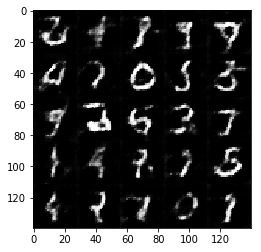

Epoch 1/2... Discriminator Loss: 1.0986... Generator Loss: 1.5236
Epoch 1/2... Discriminator Loss: 1.3404... Generator Loss: 2.1946
Epoch 1/2... Discriminator Loss: 1.0643... Generator Loss: 1.1442
Epoch 1/2... Discriminator Loss: 1.2771... Generator Loss: 1.2915
Epoch 1/2... Discriminator Loss: 1.0883... Generator Loss: 1.4314
Epoch 1/2... Discriminator Loss: 1.1053... Generator Loss: 1.0856
Epoch 1/2... Discriminator Loss: 1.3004... Generator Loss: 0.6815
Epoch 1/2... Discriminator Loss: 1.3360... Generator Loss: 0.5696
Epoch 1/2... Discriminator Loss: 1.2449... Generator Loss: 1.3631
Epoch 1/2... Discriminator Loss: 1.1401... Generator Loss: 1.0686


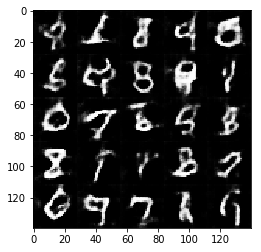

Epoch 1/2... Discriminator Loss: 1.1637... Generator Loss: 0.8572
Epoch 1/2... Discriminator Loss: 1.2655... Generator Loss: 0.7375
Epoch 1/2... Discriminator Loss: 1.4257... Generator Loss: 0.5359
Epoch 1/2... Discriminator Loss: 1.1880... Generator Loss: 0.8500
Epoch 1/2... Discriminator Loss: 3.8045... Generator Loss: 4.1496
Epoch 1/2... Discriminator Loss: 1.2412... Generator Loss: 0.9242
Epoch 1/2... Discriminator Loss: 1.2351... Generator Loss: 0.9372
Epoch 1/2... Discriminator Loss: 1.1292... Generator Loss: 1.0991
Epoch 1/2... Discriminator Loss: 1.2251... Generator Loss: 0.9644
Epoch 1/2... Discriminator Loss: 1.1161... Generator Loss: 1.1545


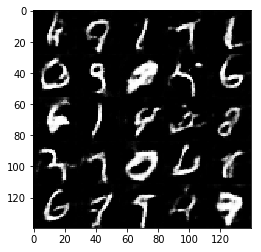

Epoch 1/2... Discriminator Loss: 1.1387... Generator Loss: 0.9279
Epoch 1/2... Discriminator Loss: 1.6869... Generator Loss: 2.2548
Epoch 1/2... Discriminator Loss: 1.1548... Generator Loss: 1.1098
Epoch 1/2... Discriminator Loss: 1.1727... Generator Loss: 0.9974
Epoch 1/2... Discriminator Loss: 1.3741... Generator Loss: 1.9307
Epoch 1/2... Discriminator Loss: 1.2117... Generator Loss: 0.7349
Epoch 2/2... Discriminator Loss: 2.0137... Generator Loss: 0.2678
Epoch 2/2... Discriminator Loss: 1.1755... Generator Loss: 0.8901
Epoch 2/2... Discriminator Loss: 1.2569... Generator Loss: 0.6706
Epoch 2/2... Discriminator Loss: 1.2015... Generator Loss: 1.0042


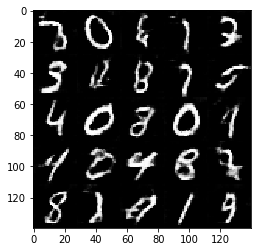

Epoch 2/2... Discriminator Loss: 2.3514... Generator Loss: 0.1904
Epoch 2/2... Discriminator Loss: 1.1780... Generator Loss: 0.7990
Epoch 2/2... Discriminator Loss: 1.1466... Generator Loss: 0.9540
Epoch 2/2... Discriminator Loss: 1.9330... Generator Loss: 2.6694
Epoch 2/2... Discriminator Loss: 1.1895... Generator Loss: 0.7656
Epoch 2/2... Discriminator Loss: 1.3280... Generator Loss: 0.5625
Epoch 2/2... Discriminator Loss: 1.2001... Generator Loss: 0.7178
Epoch 2/2... Discriminator Loss: 1.8626... Generator Loss: 0.3121
Epoch 2/2... Discriminator Loss: 1.1971... Generator Loss: 0.7713
Epoch 2/2... Discriminator Loss: 1.2955... Generator Loss: 0.6418


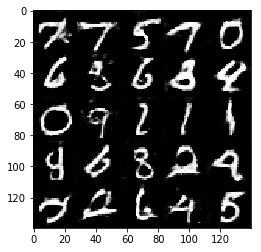

Epoch 2/2... Discriminator Loss: 1.1834... Generator Loss: 0.7586
Epoch 2/2... Discriminator Loss: 2.5058... Generator Loss: 2.9979
Epoch 2/2... Discriminator Loss: 1.2459... Generator Loss: 0.9583
Epoch 2/2... Discriminator Loss: 1.4178... Generator Loss: 1.6128
Epoch 2/2... Discriminator Loss: 1.3154... Generator Loss: 0.5668
Epoch 2/2... Discriminator Loss: 1.4692... Generator Loss: 0.4684
Epoch 2/2... Discriminator Loss: 1.1468... Generator Loss: 1.1481
Epoch 2/2... Discriminator Loss: 1.1340... Generator Loss: 0.8985
Epoch 2/2... Discriminator Loss: 1.9507... Generator Loss: 2.5502
Epoch 2/2... Discriminator Loss: 1.1415... Generator Loss: 0.8067


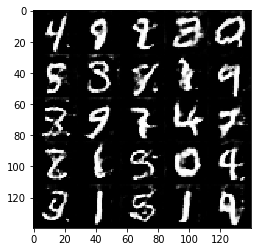

Epoch 2/2... Discriminator Loss: 1.1135... Generator Loss: 1.5050
Epoch 2/2... Discriminator Loss: 1.2683... Generator Loss: 1.6148
Epoch 2/2... Discriminator Loss: 1.1816... Generator Loss: 1.5799
Epoch 2/2... Discriminator Loss: 1.0754... Generator Loss: 0.8892
Epoch 2/2... Discriminator Loss: 1.3015... Generator Loss: 0.6930
Epoch 2/2... Discriminator Loss: 1.3199... Generator Loss: 0.6486
Epoch 2/2... Discriminator Loss: 1.1826... Generator Loss: 0.9394
Epoch 2/2... Discriminator Loss: 1.3624... Generator Loss: 0.5830
Epoch 2/2... Discriminator Loss: 1.1482... Generator Loss: 0.9194
Epoch 2/2... Discriminator Loss: 1.2551... Generator Loss: 0.6474


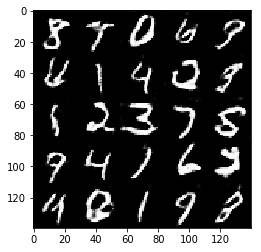

Epoch 2/2... Discriminator Loss: 1.1230... Generator Loss: 0.8130
Epoch 2/2... Discriminator Loss: 1.6947... Generator Loss: 0.3570
Epoch 2/2... Discriminator Loss: 1.1100... Generator Loss: 1.1018
Epoch 2/2... Discriminator Loss: 1.0010... Generator Loss: 1.3746
Epoch 2/2... Discriminator Loss: 1.3091... Generator Loss: 1.6195
Epoch 2/2... Discriminator Loss: 1.0613... Generator Loss: 1.1097
Epoch 2/2... Discriminator Loss: 1.1911... Generator Loss: 1.4939
Epoch 2/2... Discriminator Loss: 1.0897... Generator Loss: 1.8391
Epoch 2/2... Discriminator Loss: 1.8731... Generator Loss: 0.4082
Epoch 2/2... Discriminator Loss: 1.0860... Generator Loss: 0.7808


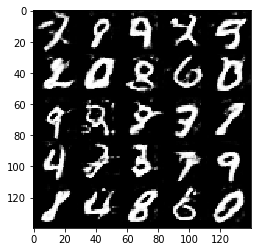

Epoch 2/2... Discriminator Loss: 1.2082... Generator Loss: 0.7255
Epoch 2/2... Discriminator Loss: 0.9779... Generator Loss: 1.0184
Epoch 2/2... Discriminator Loss: 2.3416... Generator Loss: 0.1982


In [15]:
batch_size = 128# edit
z_dim = 128 #edit
learning_rate = 0.001 #edit

betal= 0.5 #edit



"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
epochs = 2


mnist_dataset = helper.Dataset('mnist', glob(os.path.join(data_dir, 'mnist/*.jpg')))
with tf.Graph().as_default():
    train(epochs, batch_size, z_dim, learning_rate, betal, mnist_dataset.get_batches,
          mnist_dataset.shape, mnist_dataset.image_mode)

### CelebA
Run your GANs on CelebA.  It will take around 20 minutes on the average GPU to run one epoch.  You can run the whole epoch or stop when it starts to generate realistic faces.

Epoch 1/1... Discriminator Loss: 1.6833... Generator Loss: 0.4856
Epoch 1/1... Discriminator Loss: 0.9641... Generator Loss: 0.9996
Epoch 1/1... Discriminator Loss: 0.7323... Generator Loss: 1.4227
Epoch 1/1... Discriminator Loss: 0.5979... Generator Loss: 1.9763
Epoch 1/1... Discriminator Loss: 0.5322... Generator Loss: 2.3871
Epoch 1/1... Discriminator Loss: 0.5094... Generator Loss: 2.1598
Epoch 1/1... Discriminator Loss: 0.4231... Generator Loss: 3.5368
Epoch 1/1... Discriminator Loss: 0.5457... Generator Loss: 2.1152
Epoch 1/1... Discriminator Loss: 0.5274... Generator Loss: 3.6312
Epoch 1/1... Discriminator Loss: 0.5598... Generator Loss: 2.0677


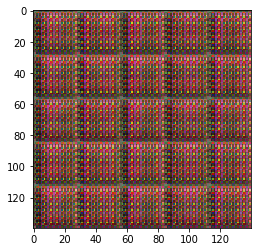

Epoch 1/1... Discriminator Loss: 0.4333... Generator Loss: 3.0711
Epoch 1/1... Discriminator Loss: 0.4232... Generator Loss: 2.9471
Epoch 1/1... Discriminator Loss: 0.4322... Generator Loss: 3.1411
Epoch 1/1... Discriminator Loss: 0.5257... Generator Loss: 2.1157
Epoch 1/1... Discriminator Loss: 0.4605... Generator Loss: 2.9311
Epoch 1/1... Discriminator Loss: 0.5341... Generator Loss: 2.1707
Epoch 1/1... Discriminator Loss: 0.4477... Generator Loss: 3.5259
Epoch 1/1... Discriminator Loss: 1.2314... Generator Loss: 4.7197
Epoch 1/1... Discriminator Loss: 0.7737... Generator Loss: 2.3593
Epoch 1/1... Discriminator Loss: 0.8336... Generator Loss: 1.8558


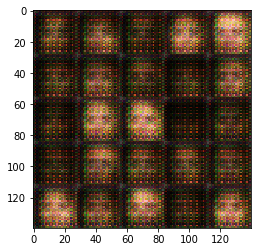

Epoch 1/1... Discriminator Loss: 0.6573... Generator Loss: 1.9057
Epoch 1/1... Discriminator Loss: 0.6709... Generator Loss: 3.1885
Epoch 1/1... Discriminator Loss: 0.8242... Generator Loss: 1.3850
Epoch 1/1... Discriminator Loss: 0.6689... Generator Loss: 2.3448
Epoch 1/1... Discriminator Loss: 0.6300... Generator Loss: 2.1951
Epoch 1/1... Discriminator Loss: 0.6385... Generator Loss: 1.8810
Epoch 1/1... Discriminator Loss: 0.5584... Generator Loss: 2.4845
Epoch 1/1... Discriminator Loss: 0.8374... Generator Loss: 2.2921
Epoch 1/1... Discriminator Loss: 0.8455... Generator Loss: 1.2767
Epoch 1/1... Discriminator Loss: 0.9041... Generator Loss: 0.9765


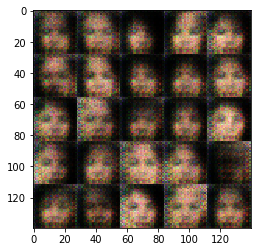

Epoch 1/1... Discriminator Loss: 0.8849... Generator Loss: 1.1879
Epoch 1/1... Discriminator Loss: 0.8944... Generator Loss: 1.2496
Epoch 1/1... Discriminator Loss: 0.8333... Generator Loss: 2.2073
Epoch 1/1... Discriminator Loss: 0.8732... Generator Loss: 1.4900
Epoch 1/1... Discriminator Loss: 0.8749... Generator Loss: 1.5476
Epoch 1/1... Discriminator Loss: 0.8770... Generator Loss: 1.3928
Epoch 1/1... Discriminator Loss: 1.0558... Generator Loss: 0.9104
Epoch 1/1... Discriminator Loss: 0.8347... Generator Loss: 2.6020
Epoch 1/1... Discriminator Loss: 0.7222... Generator Loss: 1.7438
Epoch 1/1... Discriminator Loss: 0.7864... Generator Loss: 2.2460


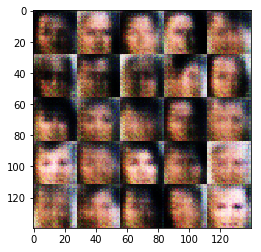

Epoch 1/1... Discriminator Loss: 0.8510... Generator Loss: 1.5424
Epoch 1/1... Discriminator Loss: 0.7721... Generator Loss: 1.4951
Epoch 1/1... Discriminator Loss: 1.5593... Generator Loss: 0.4602
Epoch 1/1... Discriminator Loss: 0.8683... Generator Loss: 2.4354
Epoch 1/1... Discriminator Loss: 0.7698... Generator Loss: 2.2502
Epoch 1/1... Discriminator Loss: 0.8656... Generator Loss: 1.5027
Epoch 1/1... Discriminator Loss: 0.6087... Generator Loss: 2.6822
Epoch 1/1... Discriminator Loss: 0.6540... Generator Loss: 2.3271
Epoch 1/1... Discriminator Loss: 0.8674... Generator Loss: 1.7102
Epoch 1/1... Discriminator Loss: 0.6918... Generator Loss: 2.0905


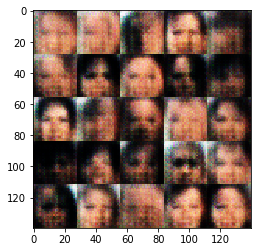

Epoch 1/1... Discriminator Loss: 1.0101... Generator Loss: 1.7910
Epoch 1/1... Discriminator Loss: 0.7815... Generator Loss: 1.3736
Epoch 1/1... Discriminator Loss: 0.8272... Generator Loss: 1.8445
Epoch 1/1... Discriminator Loss: 1.1901... Generator Loss: 0.8320
Epoch 1/1... Discriminator Loss: 0.8186... Generator Loss: 1.4487
Epoch 1/1... Discriminator Loss: 1.2786... Generator Loss: 2.3707
Epoch 1/1... Discriminator Loss: 0.7754... Generator Loss: 1.7773
Epoch 1/1... Discriminator Loss: 0.9066... Generator Loss: 1.2539
Epoch 1/1... Discriminator Loss: 1.2659... Generator Loss: 2.3638
Epoch 1/1... Discriminator Loss: 1.2028... Generator Loss: 0.9205


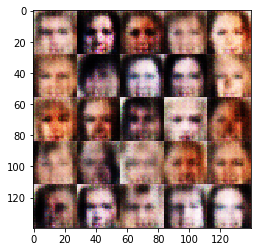

Epoch 1/1... Discriminator Loss: 1.1161... Generator Loss: 2.0885
Epoch 1/1... Discriminator Loss: 0.9889... Generator Loss: 1.0144
Epoch 1/1... Discriminator Loss: 1.0167... Generator Loss: 1.4848
Epoch 1/1... Discriminator Loss: 1.2883... Generator Loss: 0.7173
Epoch 1/1... Discriminator Loss: 1.0014... Generator Loss: 1.1071
Epoch 1/1... Discriminator Loss: 1.0445... Generator Loss: 1.0448
Epoch 1/1... Discriminator Loss: 0.9474... Generator Loss: 1.1946
Epoch 1/1... Discriminator Loss: 0.9253... Generator Loss: 1.1453
Epoch 1/1... Discriminator Loss: 1.0549... Generator Loss: 1.8316
Epoch 1/1... Discriminator Loss: 0.9455... Generator Loss: 1.3635


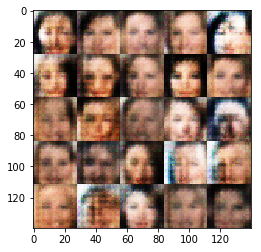

Epoch 1/1... Discriminator Loss: 1.0174... Generator Loss: 1.1933
Epoch 1/1... Discriminator Loss: 1.0917... Generator Loss: 0.8900
Epoch 1/1... Discriminator Loss: 1.0502... Generator Loss: 0.9693
Epoch 1/1... Discriminator Loss: 0.9598... Generator Loss: 1.1151
Epoch 1/1... Discriminator Loss: 0.9041... Generator Loss: 1.2617
Epoch 1/1... Discriminator Loss: 1.0407... Generator Loss: 1.2614
Epoch 1/1... Discriminator Loss: 0.9693... Generator Loss: 1.0924
Epoch 1/1... Discriminator Loss: 1.1849... Generator Loss: 0.6496
Epoch 1/1... Discriminator Loss: 1.0751... Generator Loss: 0.8787
Epoch 1/1... Discriminator Loss: 0.8946... Generator Loss: 1.3175


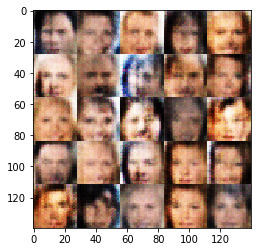

Epoch 1/1... Discriminator Loss: 1.0149... Generator Loss: 1.1511
Epoch 1/1... Discriminator Loss: 1.3024... Generator Loss: 0.6446
Epoch 1/1... Discriminator Loss: 1.1018... Generator Loss: 1.0026
Epoch 1/1... Discriminator Loss: 1.0061... Generator Loss: 1.0822
Epoch 1/1... Discriminator Loss: 0.9002... Generator Loss: 1.7684
Epoch 1/1... Discriminator Loss: 1.0665... Generator Loss: 1.2732
Epoch 1/1... Discriminator Loss: 1.0024... Generator Loss: 1.5716
Epoch 1/1... Discriminator Loss: 1.0671... Generator Loss: 1.1884
Epoch 1/1... Discriminator Loss: 0.9883... Generator Loss: 1.0333
Epoch 1/1... Discriminator Loss: 0.8275... Generator Loss: 1.5348


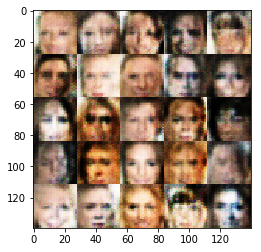

Epoch 1/1... Discriminator Loss: 1.0540... Generator Loss: 1.1102
Epoch 1/1... Discriminator Loss: 1.1089... Generator Loss: 1.2709
Epoch 1/1... Discriminator Loss: 1.1246... Generator Loss: 1.0911
Epoch 1/1... Discriminator Loss: 0.9795... Generator Loss: 1.2445
Epoch 1/1... Discriminator Loss: 1.2079... Generator Loss: 0.8422
Epoch 1/1... Discriminator Loss: 1.0011... Generator Loss: 0.9937
Epoch 1/1... Discriminator Loss: 0.9505... Generator Loss: 1.2626
Epoch 1/1... Discriminator Loss: 1.0900... Generator Loss: 1.1954
Epoch 1/1... Discriminator Loss: 1.1657... Generator Loss: 0.8158
Epoch 1/1... Discriminator Loss: 1.1488... Generator Loss: 1.4145


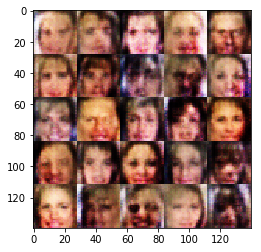

Epoch 1/1... Discriminator Loss: 1.2228... Generator Loss: 0.7540
Epoch 1/1... Discriminator Loss: 0.9723... Generator Loss: 1.1975
Epoch 1/1... Discriminator Loss: 1.8837... Generator Loss: 0.3248
Epoch 1/1... Discriminator Loss: 1.0922... Generator Loss: 0.8052
Epoch 1/1... Discriminator Loss: 1.0894... Generator Loss: 0.8574
Epoch 1/1... Discriminator Loss: 1.0185... Generator Loss: 1.3552
Epoch 1/1... Discriminator Loss: 1.1195... Generator Loss: 1.3198
Epoch 1/1... Discriminator Loss: 1.3172... Generator Loss: 0.6317
Epoch 1/1... Discriminator Loss: 1.2143... Generator Loss: 0.6663
Epoch 1/1... Discriminator Loss: 1.1908... Generator Loss: 0.7501


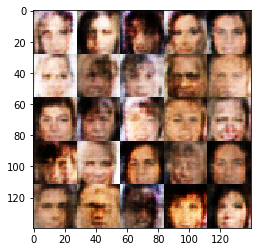

Epoch 1/1... Discriminator Loss: 1.0948... Generator Loss: 0.9467
Epoch 1/1... Discriminator Loss: 1.1906... Generator Loss: 0.8736
Epoch 1/1... Discriminator Loss: 0.9966... Generator Loss: 1.5301
Epoch 1/1... Discriminator Loss: 1.0147... Generator Loss: 1.0356
Epoch 1/1... Discriminator Loss: 1.0785... Generator Loss: 0.9944
Epoch 1/1... Discriminator Loss: 1.1317... Generator Loss: 1.1244
Epoch 1/1... Discriminator Loss: 0.9484... Generator Loss: 1.2381
Epoch 1/1... Discriminator Loss: 1.4379... Generator Loss: 0.4941
Epoch 1/1... Discriminator Loss: 1.1323... Generator Loss: 0.8407
Epoch 1/1... Discriminator Loss: 1.1378... Generator Loss: 0.9487


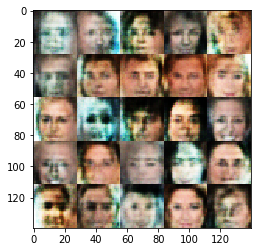

Epoch 1/1... Discriminator Loss: 0.9939... Generator Loss: 1.1610
Epoch 1/1... Discriminator Loss: 1.0850... Generator Loss: 1.0423
Epoch 1/1... Discriminator Loss: 0.9961... Generator Loss: 1.4047
Epoch 1/1... Discriminator Loss: 1.1978... Generator Loss: 0.8692
Epoch 1/1... Discriminator Loss: 1.0334... Generator Loss: 1.1682
Epoch 1/1... Discriminator Loss: 0.9959... Generator Loss: 1.0904
Epoch 1/1... Discriminator Loss: 1.2132... Generator Loss: 1.0868
Epoch 1/1... Discriminator Loss: 1.2131... Generator Loss: 0.9388
Epoch 1/1... Discriminator Loss: 1.1353... Generator Loss: 1.0314
Epoch 1/1... Discriminator Loss: 1.1661... Generator Loss: 0.8972


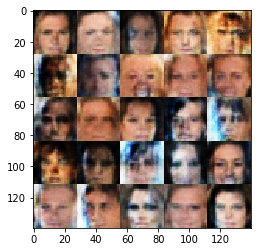

Epoch 1/1... Discriminator Loss: 1.1279... Generator Loss: 0.9587
Epoch 1/1... Discriminator Loss: 1.0492... Generator Loss: 1.6314
Epoch 1/1... Discriminator Loss: 1.0403... Generator Loss: 1.1395
Epoch 1/1... Discriminator Loss: 1.0736... Generator Loss: 0.9039
Epoch 1/1... Discriminator Loss: 1.3231... Generator Loss: 0.6875
Epoch 1/1... Discriminator Loss: 1.0329... Generator Loss: 0.9538
Epoch 1/1... Discriminator Loss: 0.9422... Generator Loss: 1.2067
Epoch 1/1... Discriminator Loss: 1.1072... Generator Loss: 0.9910
Epoch 1/1... Discriminator Loss: 1.2021... Generator Loss: 0.8347
Epoch 1/1... Discriminator Loss: 1.0979... Generator Loss: 0.8685


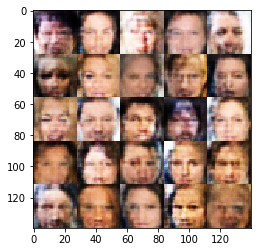

Epoch 1/1... Discriminator Loss: 1.0961... Generator Loss: 0.8721
Epoch 1/1... Discriminator Loss: 1.1015... Generator Loss: 0.9970
Epoch 1/1... Discriminator Loss: 1.0448... Generator Loss: 1.1487
Epoch 1/1... Discriminator Loss: 1.0158... Generator Loss: 0.9029
Epoch 1/1... Discriminator Loss: 1.1589... Generator Loss: 0.7652
Epoch 1/1... Discriminator Loss: 1.1308... Generator Loss: 1.0097
Epoch 1/1... Discriminator Loss: 1.2999... Generator Loss: 0.6253
Epoch 1/1... Discriminator Loss: 1.0975... Generator Loss: 1.1497
Epoch 1/1... Discriminator Loss: 0.8716... Generator Loss: 1.6536
Epoch 1/1... Discriminator Loss: 1.1876... Generator Loss: 0.8389


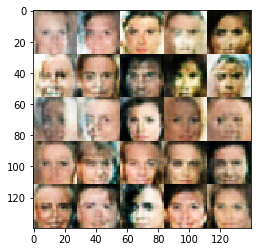

Epoch 1/1... Discriminator Loss: 1.0924... Generator Loss: 1.0486
Epoch 1/1... Discriminator Loss: 1.1447... Generator Loss: 0.9776
Epoch 1/1... Discriminator Loss: 1.0326... Generator Loss: 1.0506
Epoch 1/1... Discriminator Loss: 0.9926... Generator Loss: 1.2874
Epoch 1/1... Discriminator Loss: 1.1898... Generator Loss: 0.7318
Epoch 1/1... Discriminator Loss: 1.3702... Generator Loss: 0.5551
Epoch 1/1... Discriminator Loss: 1.1017... Generator Loss: 1.1376
Epoch 1/1... Discriminator Loss: 1.0975... Generator Loss: 1.2956
Epoch 1/1... Discriminator Loss: 1.0773... Generator Loss: 0.9843
Epoch 1/1... Discriminator Loss: 1.1177... Generator Loss: 0.9135


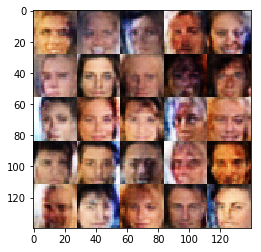

Epoch 1/1... Discriminator Loss: 1.1557... Generator Loss: 0.9344
Epoch 1/1... Discriminator Loss: 1.0269... Generator Loss: 1.0693
Epoch 1/1... Discriminator Loss: 1.1252... Generator Loss: 0.9573
Epoch 1/1... Discriminator Loss: 1.1306... Generator Loss: 0.9538
Epoch 1/1... Discriminator Loss: 1.1822... Generator Loss: 0.7986
Epoch 1/1... Discriminator Loss: 1.2335... Generator Loss: 0.7866
Epoch 1/1... Discriminator Loss: 1.1215... Generator Loss: 0.9088
Epoch 1/1... Discriminator Loss: 1.0373... Generator Loss: 1.2057
Epoch 1/1... Discriminator Loss: 1.1490... Generator Loss: 0.9863
Epoch 1/1... Discriminator Loss: 1.1132... Generator Loss: 0.9438


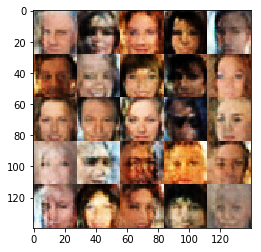

Epoch 1/1... Discriminator Loss: 1.3683... Generator Loss: 0.6145
Epoch 1/1... Discriminator Loss: 1.0269... Generator Loss: 1.0971
Epoch 1/1... Discriminator Loss: 1.1201... Generator Loss: 1.2799
Epoch 1/1... Discriminator Loss: 1.0361... Generator Loss: 1.1978
Epoch 1/1... Discriminator Loss: 1.1672... Generator Loss: 1.0362
Epoch 1/1... Discriminator Loss: 1.1973... Generator Loss: 0.8517
Epoch 1/1... Discriminator Loss: 1.1693... Generator Loss: 0.8412
Epoch 1/1... Discriminator Loss: 1.1144... Generator Loss: 0.8977
Epoch 1/1... Discriminator Loss: 1.2524... Generator Loss: 0.7104
Epoch 1/1... Discriminator Loss: 0.9175... Generator Loss: 1.4851


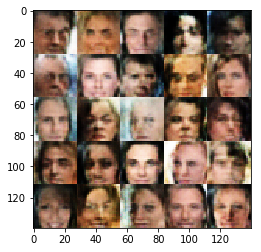

Epoch 1/1... Discriminator Loss: 1.2136... Generator Loss: 0.8316
Epoch 1/1... Discriminator Loss: 0.9603... Generator Loss: 1.1547
Epoch 1/1... Discriminator Loss: 1.0363... Generator Loss: 0.9757
Epoch 1/1... Discriminator Loss: 0.9178... Generator Loss: 1.2165
Epoch 1/1... Discriminator Loss: 1.0197... Generator Loss: 1.1494
Epoch 1/1... Discriminator Loss: 1.0767... Generator Loss: 1.1990
Epoch 1/1... Discriminator Loss: 1.1363... Generator Loss: 0.8738
Epoch 1/1... Discriminator Loss: 1.2577... Generator Loss: 0.7321
Epoch 1/1... Discriminator Loss: 1.0630... Generator Loss: 1.0640
Epoch 1/1... Discriminator Loss: 1.1516... Generator Loss: 1.0755


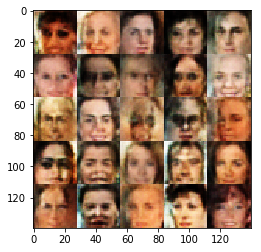

Epoch 1/1... Discriminator Loss: 1.1850... Generator Loss: 0.8680
Epoch 1/1... Discriminator Loss: 1.2775... Generator Loss: 0.7684
Epoch 1/1... Discriminator Loss: 1.1313... Generator Loss: 0.8930
Epoch 1/1... Discriminator Loss: 1.2254... Generator Loss: 0.9080
Epoch 1/1... Discriminator Loss: 1.0586... Generator Loss: 0.8651
Epoch 1/1... Discriminator Loss: 1.1237... Generator Loss: 0.9038
Epoch 1/1... Discriminator Loss: 1.1304... Generator Loss: 0.8598
Epoch 1/1... Discriminator Loss: 1.1277... Generator Loss: 0.7250
Epoch 1/1... Discriminator Loss: 1.1279... Generator Loss: 0.8106
Epoch 1/1... Discriminator Loss: 1.2397... Generator Loss: 0.7342


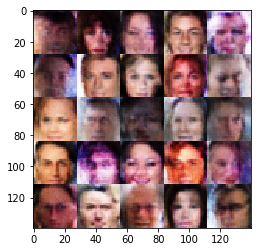

Epoch 1/1... Discriminator Loss: 0.9788... Generator Loss: 1.1825
Epoch 1/1... Discriminator Loss: 1.2897... Generator Loss: 0.6346
Epoch 1/1... Discriminator Loss: 1.0557... Generator Loss: 0.8855
Epoch 1/1... Discriminator Loss: 1.0451... Generator Loss: 1.1745
Epoch 1/1... Discriminator Loss: 1.2752... Generator Loss: 0.6235
Epoch 1/1... Discriminator Loss: 1.1089... Generator Loss: 1.0081
Epoch 1/1... Discriminator Loss: 1.0077... Generator Loss: 1.0811
Epoch 1/1... Discriminator Loss: 1.0217... Generator Loss: 0.9619
Epoch 1/1... Discriminator Loss: 1.1085... Generator Loss: 1.0203
Epoch 1/1... Discriminator Loss: 1.2870... Generator Loss: 0.6743


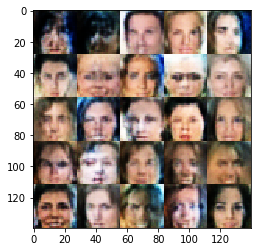

Epoch 1/1... Discriminator Loss: 0.9288... Generator Loss: 1.1688
Epoch 1/1... Discriminator Loss: 1.0904... Generator Loss: 1.2225
Epoch 1/1... Discriminator Loss: 1.0701... Generator Loss: 1.0101
Epoch 1/1... Discriminator Loss: 1.1658... Generator Loss: 0.8833
Epoch 1/1... Discriminator Loss: 0.9464... Generator Loss: 1.1050
Epoch 1/1... Discriminator Loss: 1.2797... Generator Loss: 0.5971
Epoch 1/1... Discriminator Loss: 1.0826... Generator Loss: 0.9288
Epoch 1/1... Discriminator Loss: 1.4029... Generator Loss: 0.7301
Epoch 1/1... Discriminator Loss: 1.0317... Generator Loss: 0.9089
Epoch 1/1... Discriminator Loss: 1.1724... Generator Loss: 0.9915


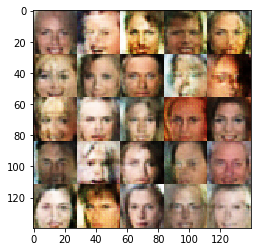

Epoch 1/1... Discriminator Loss: 1.3718... Generator Loss: 0.5865
Epoch 1/1... Discriminator Loss: 1.3836... Generator Loss: 0.8250
Epoch 1/1... Discriminator Loss: 1.1358... Generator Loss: 0.7852
Epoch 1/1... Discriminator Loss: 0.9968... Generator Loss: 1.1491
Epoch 1/1... Discriminator Loss: 1.2646... Generator Loss: 0.8281
Epoch 1/1... Discriminator Loss: 0.9952... Generator Loss: 1.1664
Epoch 1/1... Discriminator Loss: 1.1796... Generator Loss: 0.7619
Epoch 1/1... Discriminator Loss: 1.0102... Generator Loss: 0.9552
Epoch 1/1... Discriminator Loss: 1.1204... Generator Loss: 1.1818
Epoch 1/1... Discriminator Loss: 1.1926... Generator Loss: 0.8379


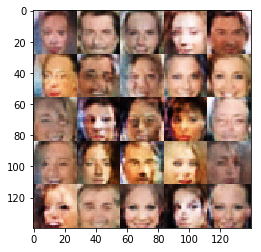

Epoch 1/1... Discriminator Loss: 1.1887... Generator Loss: 0.7505
Epoch 1/1... Discriminator Loss: 1.2228... Generator Loss: 0.9242
Epoch 1/1... Discriminator Loss: 1.0049... Generator Loss: 1.1773
Epoch 1/1... Discriminator Loss: 1.2926... Generator Loss: 0.7200
Epoch 1/1... Discriminator Loss: 0.9738... Generator Loss: 1.2418
Epoch 1/1... Discriminator Loss: 1.1609... Generator Loss: 0.9718
Epoch 1/1... Discriminator Loss: 1.0164... Generator Loss: 1.0634
Epoch 1/1... Discriminator Loss: 1.0912... Generator Loss: 1.0272
Epoch 1/1... Discriminator Loss: 0.9582... Generator Loss: 1.0761
Epoch 1/1... Discriminator Loss: 1.1278... Generator Loss: 1.0062


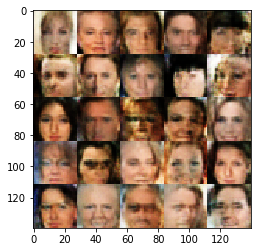

Epoch 1/1... Discriminator Loss: 1.1409... Generator Loss: 1.2928
Epoch 1/1... Discriminator Loss: 1.1145... Generator Loss: 0.9595
Epoch 1/1... Discriminator Loss: 1.1905... Generator Loss: 0.7787
Epoch 1/1... Discriminator Loss: 1.2973... Generator Loss: 0.7647
Epoch 1/1... Discriminator Loss: 1.1788... Generator Loss: 0.9457
Epoch 1/1... Discriminator Loss: 0.9384... Generator Loss: 1.3436
Epoch 1/1... Discriminator Loss: 1.3631... Generator Loss: 0.6027
Epoch 1/1... Discriminator Loss: 1.1091... Generator Loss: 1.0052
Epoch 1/1... Discriminator Loss: 1.3348... Generator Loss: 0.6723
Epoch 1/1... Discriminator Loss: 1.1004... Generator Loss: 1.1012


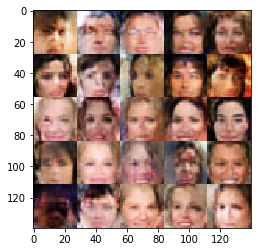

Epoch 1/1... Discriminator Loss: 1.1178... Generator Loss: 1.0223
Epoch 1/1... Discriminator Loss: 1.1717... Generator Loss: 0.9943
Epoch 1/1... Discriminator Loss: 1.1930... Generator Loss: 0.9547
Epoch 1/1... Discriminator Loss: 1.2486... Generator Loss: 0.6768
Epoch 1/1... Discriminator Loss: 1.2452... Generator Loss: 0.9860
Epoch 1/1... Discriminator Loss: 1.0958... Generator Loss: 0.8812
Epoch 1/1... Discriminator Loss: 0.8682... Generator Loss: 1.1000
Epoch 1/1... Discriminator Loss: 1.1215... Generator Loss: 1.0772
Epoch 1/1... Discriminator Loss: 1.2067... Generator Loss: 0.7127
Epoch 1/1... Discriminator Loss: 1.2231... Generator Loss: 0.8692


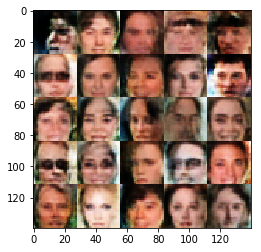

Epoch 1/1... Discriminator Loss: 1.1197... Generator Loss: 1.0161
Epoch 1/1... Discriminator Loss: 1.3037... Generator Loss: 1.0797
Epoch 1/1... Discriminator Loss: 1.3292... Generator Loss: 0.6905
Epoch 1/1... Discriminator Loss: 0.9426... Generator Loss: 1.0909
Epoch 1/1... Discriminator Loss: 1.1012... Generator Loss: 0.9324
Epoch 1/1... Discriminator Loss: 0.9109... Generator Loss: 1.1065
Epoch 1/1... Discriminator Loss: 0.9593... Generator Loss: 1.1453
Epoch 1/1... Discriminator Loss: 1.1752... Generator Loss: 0.7633
Epoch 1/1... Discriminator Loss: 0.9737... Generator Loss: 1.0931
Epoch 1/1... Discriminator Loss: 1.1523... Generator Loss: 1.0568


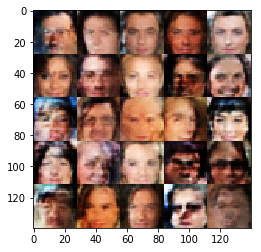

Epoch 1/1... Discriminator Loss: 1.0952... Generator Loss: 1.0074
Epoch 1/1... Discriminator Loss: 1.2417... Generator Loss: 0.7423
Epoch 1/1... Discriminator Loss: 0.8856... Generator Loss: 1.3121
Epoch 1/1... Discriminator Loss: 1.1272... Generator Loss: 0.8098
Epoch 1/1... Discriminator Loss: 1.2197... Generator Loss: 0.7780
Epoch 1/1... Discriminator Loss: 1.1725... Generator Loss: 0.8946
Epoch 1/1... Discriminator Loss: 1.2939... Generator Loss: 0.6440
Epoch 1/1... Discriminator Loss: 1.0597... Generator Loss: 0.8624
Epoch 1/1... Discriminator Loss: 1.1457... Generator Loss: 0.8540
Epoch 1/1... Discriminator Loss: 1.1880... Generator Loss: 0.8179


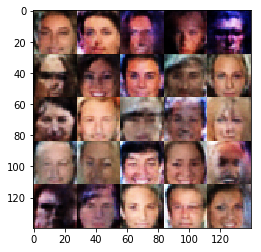

KeyboardInterrupt: 

In [16]:
batch_size = 64 #edit
z_dim = 100  #edit
learning_rate = 0.0001  #edit
beta1 = 0.5 #edit


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
epochs = 1

celeba_dataset = helper.Dataset('celeba', glob(os.path.join(data_dir, 'img_align_celeba/*.jpg')))
with tf.Graph().as_default():
    train(epochs, batch_size, z_dim, learning_rate, beta1, celeba_dataset.get_batches,
          celeba_dataset.shape, celeba_dataset.image_mode)

### Submitting This Project
When submitting this project, make sure to run all the cells before saving the notebook. Save the notebook file as "dlnd_face_generation.ipynb" and save it as a HTML file under "File" -> "Download as". Include the "helper.py" and "problem_unittests.py" files in your submission.